In [1]:
%matplotlib inline

import os.path as op
import mne

#Mayavi
#from mayavi import mlab 
#mlab.options.offscreen = True
#mlab.init_notebook() 


from mne.datasets import sample
data_path = sample.data_path()

# the raw file containing the channel location + types
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
# The paths to Freesurfer reconstructions
subjects_dir = data_path + '/subjects'
subject = 'sample'

In [ ]:
info = mne.io.read_info(raw_fname)


# Forward operator

It needs:
* -trans.fif file that contains the coregistration info. 
* A source space
* The BEM surfaces

# Compute and visualize BEM surfaces


* 3 layers for EEG: inner skull, outer skull, and skin (surfaces)
* 1 layer for MEG: inner skull (surfaces)

For the computing of surfacing is required FreeSurfer. 

Using surface: /Users/ricklicona/mne_data/MNE-sample-data/subjects/sample/bem/inner_skull.surf
Using surface: /Users/ricklicona/mne_data/MNE-sample-data/subjects/sample/bem/outer_skull.surf
Using surface: /Users/ricklicona/mne_data/MNE-sample-data/subjects/sample/bem/outer_skin.surf


/Users/ricklicona/PycharmProjects/RExam/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


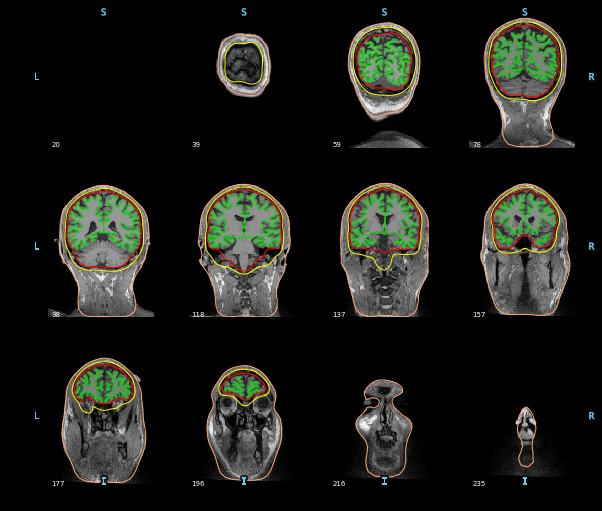

In [2]:


bem_surfaces = mne.viz.plot_bem(subject=subject, subjects_dir=subjects_dir,
                 brain_surfaces='white', orientation='coronal')
# bem_surfaces.savefig('./bem_surfaces.svg', format='svg', dpi=1200)
# bem_surfaces.savefig('./bem_surfaces.png')

#bem_surfaces.savefig('Plots/bem_surfaces.eps', format='eps')

# Visualizing the coregistration

Is the operation that allows to position the head and the sensors in a common coordinate system. In MNE it is called **trans file** (-trans.fif file). It can be obtained:

* mne.gui.coregistration()
* mrilab in the case of using a Neuromag system

In this code example, "the coregistration is done", and we just visually check the aligment.

What is mne.sys_info()? I wonder if your OpenGL support is too old.

You could try wrapping the plot_alignment call in a with mne.viz.use_3d_backend('pyvista') to see if PyVista does any better, but these both use VTK under the hood so I'd be suprised.

In [ ]:
# The transformation file obtained by coregistration
trans = data_path + '/MEG/sample/sample_audvis_raw-trans.fif'

info = mne.io.read_info(raw_fname)
# Here we look at the dense head, which isn't used for BEM computations but
# is useful for coregistration.
with mne.viz.use_3d_backend('pyvista'):

        mne.viz.plot_alignment(info, trans, subject=subject, dig=True,
                       meg=["helmet", "sensors"], subjects_dir=subjects_dir,
                       surfaces='head-dense')
#coregistration

In [5]:
import mne
fname = mne.datasets.sample.data_path() + '/MEG/sample/sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(fname)
with mne.viz.use_3d_backend('pyvista'):
    mne.viz.plot_alignment(raw.info, show_axes=True, eeg=False, surfaces=[])

Opening raw data file /Users/ricklicona/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Getting helmet for system 306m


In [3]:
,file obtained by coregistration
trans = data_path + '/MEG/sample/sample_audvis_raw-trans.fif'

info = mne.io.read_info(raw_fname)
# Here we look at the dense head, which isn't used for BEM computations but
# is useful for coregistration.
mne.viz.plot_alignment(info, trans, subject=subject, dig=True,
                       meg=['helmet', 'sensors'], subjects_dir=subjects_dir,
                       surfaces='head-dense')

    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
Using lh.seghead for head surface.
Getting helmet for system 306m
Using pyvista 3d backend.



In [4]:
mne.sys_info()

Platform:      macOS-10.15.7-x86_64-i386-64bit
Python:        3.6.0 (v3.6.0:41df79263a11, Dec 22 2016, 17:23:13)  [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
Executable:    /Users/ricklicona/PycharmProjects/RExam/bin/python
CPU:           i386: 8 cores
Memory:        Unavailable (requires "psutil" package)
mne:           0.21.0
numpy:         1.15.2 {blas=openblas, lapack=openblas}
scipy:         1.5.2
matplotlib:    3.0.2 {backend=module://ipykernel.pylab.backend_inline}

sklearn:       0.21.3
numba:         0.43.1
nibabel:       3.1.1
cupy:          Not found
pandas:        0.25.1
dipy:          Not found
mayavi:        4.7.2
pyvista:       0.26.0 {pyvistaqt=0.2.0, OpenGL 4.1 ATI-3.10.18 via ATI Radeon R9 M370X OpenGL Engine}
vtk:           8.1.2
PyQt5:         5.15.1


# Compute Source Space

The source space defines the position and orientation of the candidate source locations. 

* surface-based: source space when the candidates are confined to a surface *mne.setup_source_space()*
* volumetric or discrete: source space when the candidates are discrete, arbitrarily located source points bounded by the surface *mne.setup_volume_source_space()*

We will compute a **surface-based source space** with an **oct6** resolution ([More resolutions and setting up the source space](https://mne.tools/stable/overview/cookbook.html#setting-up-source-space))

In [7]:
src = mne.setup_source_space(subject, spacing='oct6', add_dist='patch', 
                            subjects_dir=subjects_dir)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/ricklicona/mne_data/MNE-sample-data/subjects
Subject      = sample
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/ricklicona/mne_data/MNE-sample-data/subjects/sample/surf/lh.white...
Mapping lh sample -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/ricklicona/mne_data/MNE-sample-data/subjects/sample/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/155407 selected to source space (oct = 6)

Loading /Users/ricklicona/mne_data/MNE-sample-data/subjects/sample/surf/rh.white...
Mapping rh sample -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/ricklicona/mne_data/MNE-sample-data/subjects/sample/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 4098

## Source-based space

The source based source space **src** contains 2 parts, one for the **left hemisphere** (4098) locations and one for the **right hemisphere** (4098 locations). Sources can be visualized on top of the BEM surfaces in purple. 

In [ ]:
source_based_space = mne.viz.plot_bem(subject=subject, subjects_dir=subjects_dir, 
                brain_surfaces='white', src=src, orientation='coronal')

source_based_space.savefig('Plots/source_based_space.eps', format='eps')

##  Volume-based source inside a sphere of radius 90mm 

To compute a volume based source space defined with a grid of candidate dipoles inside a sphere of radius 90mm centered at (0.0, 0.0, 40.0) mm you can use the following code. Obviously here, the sphere is not perfect. It is not restricted to the brain and it can miss some parts of the cortex.

In [ ]:
sphere = (0.0, 0.0, 0.04, 0.09)
vol_src = mne.setup_volume_source_space(subject, subjects_dir=subjects_dir,
                                        sphere=sphere, sphere_units='m')
print(vol_src)

volume_based_source_sphere = mne.viz.plot_bem(subject=subject, subjects_dir=subjects_dir,
                brain_surfaces='white', src=vol_src, orientation='coronal')

volume_based_source_sphere.savefig('Plots/volume_based_source-sphere.eps', format='eps')

##  Volume-based source inside the brain

To compute a volume based source space defined with a grid of candidate dipoles inside the brain **(requires the BEM surfaces)** you can use the following.

In [ ]:
surface = op.join(subjects_dir, subject, 'bem', 'inner_skull.surf')
vol_src = mne.setup_volume_source_space(subject, subjects_dir=subjects_dir,
                                       surface=surface)
print(vol_src)

volume_based_source_brain = mne.viz.plot_bem(subject=subject, subjects_dir=subjects_dir,
                brain_surfaces='white', src=vol_src, orientation='coronal')

volume_based_source_brain.savefig('Plots/volume_based_source_brain.eps', format='eps')

### Note

Some sources may appear to be outside the BEM inner skull contour. This is because the **slices** are decimated for plotting here. Each slice in the figure actually represents several MRI slices, but only the MRI voxels and BEM boundaries for a single (midpoint of the given slice range) slice are shown, whereas the source space points plotted on that midpoint slice consist of all points for which that slice (out of all slices shown) was the closest.

## Sources in 3D

In [8]:
fig = mne.viz.plot_alignment(subject=subject, subjects_dir=subjects_dir,
                             surfaces='white', coord_frame='head',
                             src=src)
mne.viz.set_3d_view(fig, azimuth=173.78, elevation=101.75,
                    distance=0.30, focalpoint=(-0.03, -0.01, 0.03))

## Compute forward solution

We can now compute the **forward solution**. To reduce computation we’ll just compute a single layer BEM (just inner skull) that can then be **used for MEG (not EEG)**. We specify if we want a one-layer or a three-layer BEM using the conductivity parameter. The BEM solution requires a BEM model which describes the geometry of the head the conductivities of the different tissues.

In [ ]:
conductivity = (0.3,)  # for single layer
# conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(subject='sample', ico=4,
                           conductivity=conductivity,
                           subjects_dir=subjects_dir)
bem = mne.make_bem_solution(model)

### Note

Note that the BEM does not involve any use of the trans file. The **BEM only depends on the head geometry and conductivities**. It is therefore independent from the MEG data and the head position.

Let’s now **compute the forward operator, commonly referred to as the gain or leadfield matrix**. See mne.make_forward_solution() for details on the meaning of each parameter.

In [ ]:
fwd = mne.make_forward_solution(raw_fname, trans=trans, src=src, bem=bem,
                                meg=True, eeg=False, mindist=5.0, n_jobs=2)
print(fwd)

We can explore the content of fwd to access the numpy array that contains the **the gain matrix**. 

In [ ]:
leadfield = fwd['sol']['data']
print("Leadfield size: %d sensors x %d dipoles" % leadfield.shape)

This is equivalent to the following code that **explicitly applies the forward operator** to a source estimate composed of the identity operator (which we omit here because it uses a lot of memory). 

In [ ]:
import numpy as np
n_dipoles = leadfield.shape[1]
vertices = [src_hemi['vertno'] for src_hrmi in fwd_fixed['src']]
stc = mne.SourceEstimate(1e-9 * np.eye(n_dipoles), vertices)
leadfield = mne.apply_forward(fwd_fixed, stc, info).data /1e-9

To save to disk a forward solution you can use mne.write_forward_solution() and to read it back from disk mne.read_forward_solution(). **Don’t forget that FIF files containing forward solution should end with -fwd.fif.**

To get a fixed-orientation forward solution, use mne.convert_forward_solution() to convert the free-orientation solution to (surface-oriented) fixed orientation.